In [42]:
%matplotlib inline
import six.moves.cPickle as pickle
import numpy as np
import matplotlib.pyplot as plt


In [288]:
def collect_losses(files):
    l = []
    for f in files:
        p = pickle.load(open(f, "rb"))
        ls = np.array([s["loss"] for s in p["train"]])
        l.append(ls)
    return np.concatenate(l)

In [297]:
losses = collect_losses([
        '/data/depth_models/vnet2_tmp_loss.pkl'
    ])
# Epoch-wise mean
N = 825

if len(losses) < 2*N:
    print "Warning: Less than two epochs of training."
nn  = np.zeros((len(losses) // N))
for x in range(len(losses) // N):
    nn[x] = losses[x*N:(x+1)*N].mean()

19


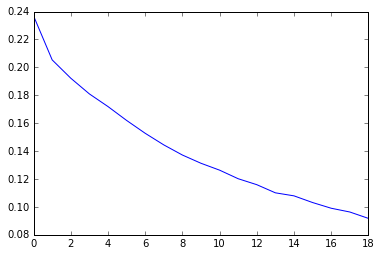

In [298]:
plt.plot(nn)
print len(nn)
plt.show()